In [1]:
import torch
import numpy as np
from torch.utils import data
from torch.nn import init
from matplotlib import pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
#加载数据集
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True,
download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False,
download=True, transform=transforms.ToTensor())

#定义计算测试集损失函数
def evaluate_loss(data_iter, net):
    l, n = 0.0, 0
    for X, y in data_iter:
        X = X.view((-1, num_inputs)) 
        l += loss(net(X),y).sum().item()
        n += y.shape[0]
    return l / n

#定义计算测试集准确率函数
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        X = X.view((-1, num_inputs)) 
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

#定义训练参数
batch_size, num_epochs, lr = 256, 30, 0.01

#定义损失函数
loss = torch.nn.CrossEntropyLoss()

#划分数据集
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [3]:
# ========================= 256个隐藏单元个数 ========================= #

#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

class Onehidden_Classification(torch.nn.Module):
    def __init__(self):
        super(Onehidden_Classification, self).__init__()
        self.hidden = torch.nn.Linear(num_inputs, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.output = torch.nn.Linear(num_hiddens, num_outputs)#定义输出层函数

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

net_one = Onehidden_Classification()

#初始化模型参数
init.normal_(net_one.hidden.weight, mean=0, std=0.01)
init.normal_(net_one.output.weight, mean=0, std=0.01)
init.constant_(net_one.hidden.bias, val=0)
init.constant_(net_one.output.bias, val=0)

#定义优化器
optimizer = optim.SGD(net_one.parameters(), lr)

#训练模型
loss_train_one = []
loss_test_one = []
acc_train_one = []
acc_test_one = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.view((-1, num_inputs)) 
        y_hat = net_one(X)
        l = loss(y_hat,y).sum()   
        optimizer.zero_grad()
        l.backward()       #计算损失     
        optimizer.step()   #更新梯度
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    loss_train_one.append(train_l_sum/n)
    loss_test_one.append(evaluate_loss(test_iter,net_one))
    acc_train_one.append(train_acc_sum/n)
    acc_test_one.append(evaluate_accuracy(test_iter,net_one))
    print('epoch %d, loss_train %f, loss_test %f, acc_train %f, acc_test %f '% 
          (epoch+1, loss_train_one[epoch], loss_test_one[epoch], acc_train_one[epoch], acc_test_one[epoch]))

epoch 1, loss_train 0.008364, loss_test 0.007357, acc_train 0.417867, acc_test 0.502800 
epoch 2, loss_train 0.005933, loss_test 0.005084, acc_train 0.564667, acc_test 0.620600 
epoch 3, loss_train 0.004390, loss_test 0.004067, acc_train 0.642383, acc_test 0.644700 
epoch 4, loss_train 0.003672, loss_test 0.003561, acc_train 0.669400, acc_test 0.672000 
epoch 5, loss_train 0.003294, loss_test 0.003275, acc_train 0.689717, acc_test 0.689600 
epoch 6, loss_train 0.003060, loss_test 0.003078, acc_train 0.711400, acc_test 0.714100 
epoch 7, loss_train 0.002891, loss_test 0.002930, acc_train 0.731983, acc_test 0.729200 
epoch 8, loss_train 0.002754, loss_test 0.002799, acc_train 0.748783, acc_test 0.747700 
epoch 9, loss_train 0.002639, loss_test 0.002698, acc_train 0.762183, acc_test 0.760300 
epoch 10, loss_train 0.002541, loss_test 0.002600, acc_train 0.774700, acc_test 0.769500 
epoch 11, loss_train 0.002456, loss_test 0.002526, acc_train 0.784467, acc_test 0.777200 
epoch 12, loss_trai

In [4]:
# ========================= 128个隐藏单元个数 ========================= #

#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 128

class Twohidden_Classification(torch.nn.Module):
    def __init__(self):
        super(Twohidden_Classification, self).__init__()
        self.hidden = torch.nn.Linear(num_inputs, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.output = torch.nn.Linear(num_hiddens, num_outputs)#定义输出层函数

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

net_two = Twohidden_Classification()

#初始化模型参数
init.normal_(net_two.hidden.weight, mean=0, std=0.01)
init.normal_(net_two.output.weight, mean=0, std=0.01)
init.constant_(net_two.hidden.bias, val=0)
init.constant_(net_two.output.bias, val=0)

#定义优化器
optimizer = optim.SGD(net_two.parameters(), lr)

#训练模型
loss_train_two = []
loss_test_two = []
acc_train_two = []
acc_test_two = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.view((-1, num_inputs)) 
        y_hat = net_two(X)
        l = loss(y_hat,y).sum()   
        optimizer.zero_grad()
        l.backward()       #计算损失     
        optimizer.step()   #更新梯度
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    loss_train_two.append(train_l_sum/n)
    loss_test_two.append(evaluate_loss(test_iter,net_two))
    acc_train_two.append(train_acc_sum/n)
    acc_test_two.append(evaluate_accuracy(test_iter,net_two))
    print('epoch %d, loss_train %f, loss_test %f, acc_train %f, acc_test %f '% 
          (epoch+1, loss_train_two[epoch], loss_test_two[epoch], acc_train_two[epoch], acc_test_two[epoch]))

epoch 1, loss_train 0.008643, loss_test 0.008007, acc_train 0.214550, acc_test 0.311600 
epoch 2, loss_train 0.006506, loss_test 0.005547, acc_train 0.497983, acc_test 0.580700 
epoch 3, loss_train 0.004753, loss_test 0.004344, acc_train 0.612567, acc_test 0.624200 
epoch 4, loss_train 0.003893, loss_test 0.003738, acc_train 0.651333, acc_test 0.652500 
epoch 5, loss_train 0.003440, loss_test 0.003402, acc_train 0.674400, acc_test 0.668100 
epoch 6, loss_train 0.003174, loss_test 0.003184, acc_train 0.693417, acc_test 0.691500 
epoch 7, loss_train 0.002994, loss_test 0.003034, acc_train 0.713850, acc_test 0.709000 
epoch 8, loss_train 0.002854, loss_test 0.002900, acc_train 0.732883, acc_test 0.728200 
epoch 9, loss_train 0.002737, loss_test 0.002789, acc_train 0.748383, acc_test 0.747900 
epoch 10, loss_train 0.002633, loss_test 0.002693, acc_train 0.762167, acc_test 0.756700 
epoch 11, loss_train 0.002541, loss_test 0.002610, acc_train 0.772483, acc_test 0.768900 
epoch 12, loss_trai

In [5]:
# ========================= 64个隐藏单元个数 ========================= #

#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 64

class Thehidden_Classification(torch.nn.Module):
    def __init__(self):
        super(Thehidden_Classification, self).__init__()
        self.hidden = torch.nn.Linear(num_inputs, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.output = torch.nn.Linear(num_hiddens, num_outputs)#定义输出层函数

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

net_thr = Thehidden_Classification()

#初始化模型参数
init.normal_(net_thr.hidden.weight, mean=0, std=0.01)
init.normal_(net_thr.output.weight, mean=0, std=0.01)
init.constant_(net_thr.hidden.bias, val=0)
init.constant_(net_thr.output.bias, val=0)

#定义优化器
optimizer = optim.SGD(net_thr.parameters(), lr)

#训练模型
loss_train_thr = []
loss_test_thr = []
acc_train_thr = []
acc_test_thr = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.view((-1, num_inputs)) 
        y_hat = net_thr(X)
        l = loss(y_hat,y).sum()   
        optimizer.zero_grad()
        l.backward()       #计算损失     
        optimizer.step()   #更新梯度
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    loss_train_thr.append(train_l_sum/n)
    loss_test_thr.append(evaluate_loss(test_iter,net_thr))
    acc_train_thr.append(train_acc_sum/n)
    acc_test_thr.append(evaluate_accuracy(test_iter,net_thr))
    print('epoch %d, loss_train %f, loss_test %f, acc_train %f, acc_test %f '% 
          (epoch+1, loss_train_thr[epoch], loss_test_thr[epoch], acc_train_thr[epoch], acc_test_thr[epoch]))

epoch 1, loss_train 0.008740, loss_test 0.008239, acc_train 0.299450, acc_test 0.333700 
epoch 2, loss_train 0.006752, loss_test 0.005768, acc_train 0.413950, acc_test 0.540600 
epoch 3, loss_train 0.004976, loss_test 0.004567, acc_train 0.578783, acc_test 0.595500 
epoch 4, loss_train 0.004098, loss_test 0.003922, acc_train 0.626667, acc_test 0.639500 
epoch 5, loss_train 0.003607, loss_test 0.003551, acc_train 0.660917, acc_test 0.653200 
epoch 6, loss_train 0.003308, loss_test 0.003313, acc_train 0.680533, acc_test 0.674600 
epoch 7, loss_train 0.003108, loss_test 0.003142, acc_train 0.698567, acc_test 0.701500 
epoch 8, loss_train 0.002960, loss_test 0.003006, acc_train 0.719367, acc_test 0.717100 
epoch 9, loss_train 0.002835, loss_test 0.002892, acc_train 0.735733, acc_test 0.733200 
epoch 10, loss_train 0.002730, loss_test 0.002791, acc_train 0.750083, acc_test 0.749600 
epoch 11, loss_train 0.002635, loss_test 0.002698, acc_train 0.763300, acc_test 0.760500 
epoch 12, loss_trai

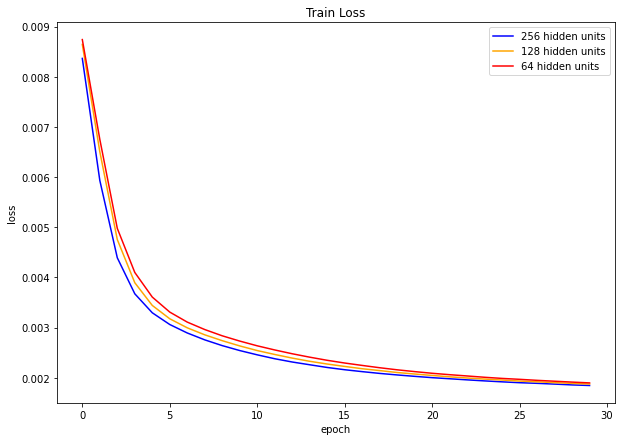

In [6]:
plt.figure(figsize=(10,7))
plt.plot(loss_train_one,label='256 hidden units',color='blue')
plt.plot(loss_train_two,label='128 hidden units', color='orange')
plt.plot(loss_train_thr,label='64 hidden units', color='red')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Train Loss")
plt.legend()
plt.show()

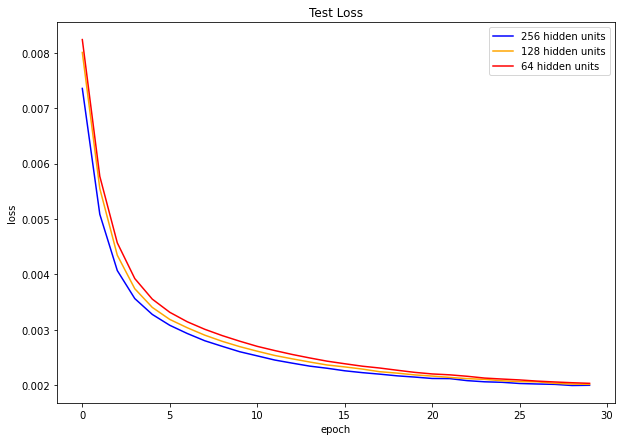

In [7]:
plt.figure(figsize=(10,7))
plt.plot(loss_test_one,label='256 hidden units',color='blue')
plt.plot(loss_test_two,label='128 hidden units', color='orange')
plt.plot(loss_test_thr,label='64 hidden units', color='red')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Test Loss")
plt.legend()
plt.show()

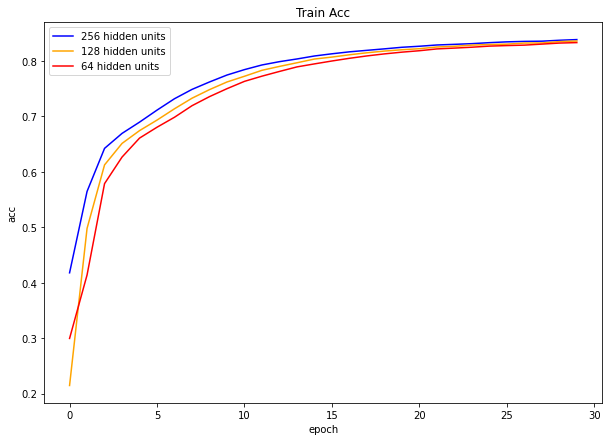

In [8]:
plt.figure(figsize=(10,7))
plt.plot(acc_train_one,label='256 hidden units',color='blue')
plt.plot(acc_train_two,label='128 hidden units', color='orange')
plt.plot(acc_train_thr,label='64 hidden units', color='red')
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title("Train Acc")
plt.legend()
plt.show()

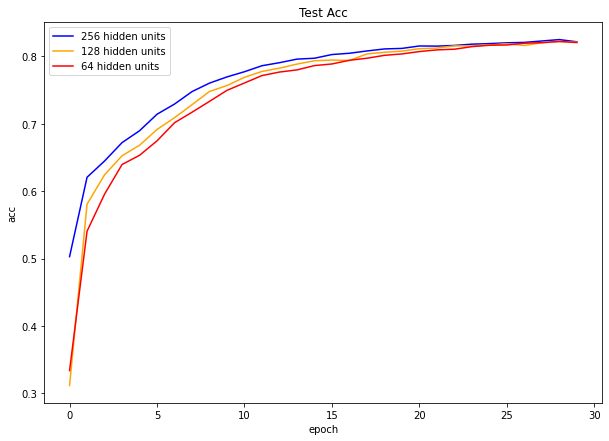

In [9]:
plt.figure(figsize=(10,7))
plt.plot(acc_test_one,label='256 hidden units',color='blue')
plt.plot(acc_test_two,label='128 hidden units', color='orange')
plt.plot(acc_test_thr,label='64 hidden units', color='red')
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title("Test Acc")
plt.legend()
plt.show()